In [56]:
import theano
import numpy as np
from theano import tensor as T
from theano.tensor.nnet import conv


rng = np.random.RandomState(42)


input_tensor = T.tensor4('input_tensor')
W = theano.shared(rng.uniform(low=-0.1, high=0.1, size=(2, 3, 8, 8)), name ='W')
conv_out = conv.conv2d(input_tensor, W)
output = T.nnet.sigmoid(conv_out)
f = theano.function([input_tensor], output)

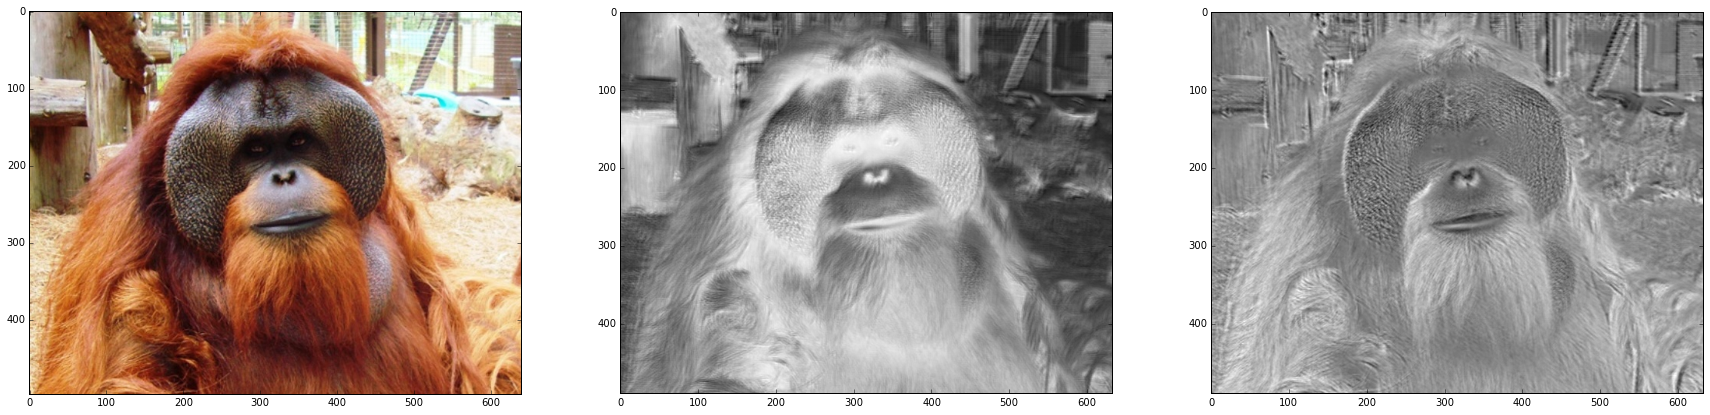

In [57]:
import matplotlib
matplotlib.use('Agg')
import pylab
from PIL import Image
%matplotlib inline

img = Image.open(open('pongors1.jpeg'))
img = np.asarray(img) / 256.

# (height, width, channel) put image in 4D tensor of shape (1, 3, height, width)
img_ = img.transpose(2, 0, 1).reshape(1, 3, 497, 640)
filtered_img = f(img_)
fig = pylab.figure(1, (30., 30.))

pylab.gray()
pylab.subplot(1, 3, 1)
pylab.imshow(img)
pylab.subplot(1, 3, 2)
pylab.imshow(filtered_img[0, 0, :, :])
pylab.subplot(1, 3, 3)
pylab.imshow(filtered_img[0, 1, :, :])
pylab.show()

(1, 2, 245, 317)


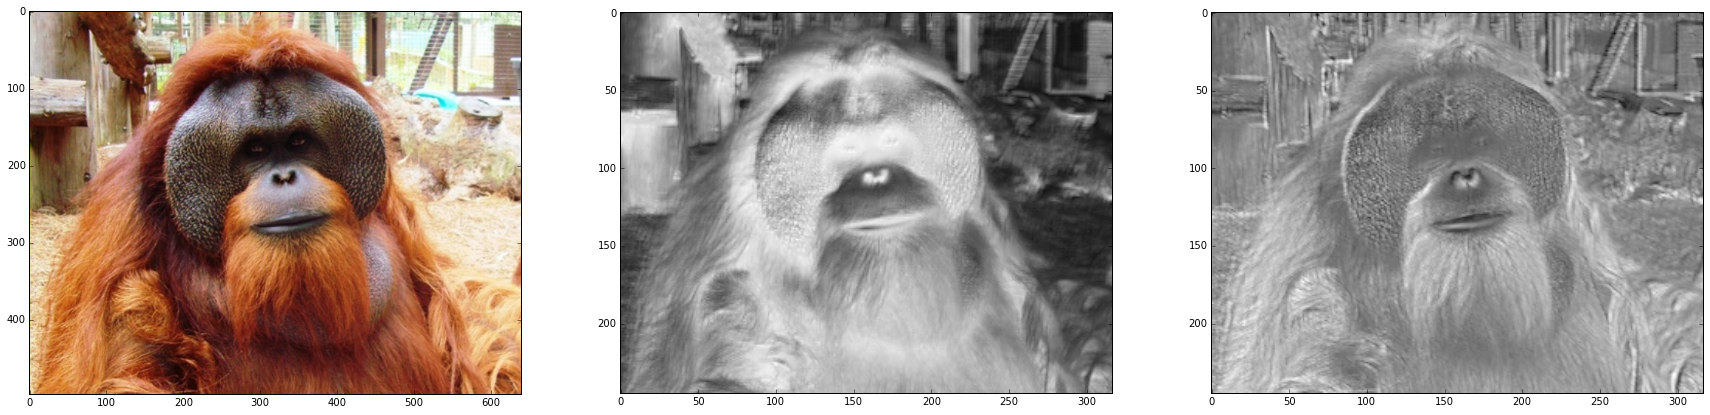

In [58]:
from theano.tensor.signal.downsample import max_pool_2d

pool_out = max_pool_2d(output, (2, 2))
g = theano.function([input_tensor], pool_out)

filtered_img = g(img_)
print filtered_img.shape
fig = pylab.figure(1, (30., 30.))

pylab.gray()
pylab.subplot(1, 3, 1)
pylab.imshow(img)
pylab.subplot(1, 3, 2)
pylab.imshow(filtered_img[0, 0, :, :])
pylab.subplot(1, 3, 3)
pylab.imshow(filtered_img[0, 1, :, :])
pylab.show()